In [ ]:
#evrişimsel sinir ağları
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [ ]:
veri = pd.read_csv("egitim.csv")
print("verinin boyutu: ",veri.shape)
veri.head()

verinin boyutu:  (2313, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#labelları ayıralım
Y_veri = veri["label"]
# X eğitim veri seti , pikselleri içeriyor. label sütununu çıkardık
X_veri = veri.drop(["label"],axis=1)
print("y veri= ",Y_veri.shape)
print("x veri= ",X_veri.shape)

y veri=  (2313,)
x veri=  (2313, 784)


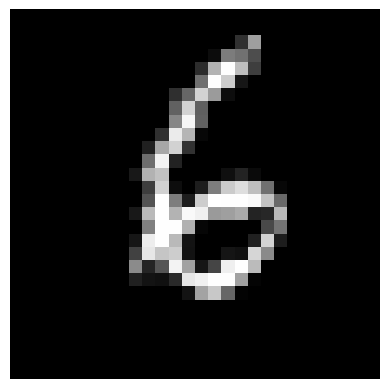

In [ ]:
# veri görselleştirme (2000.indexte bulunan sayı)
resim1 = X_veri.iloc[2000].values
resim1 = resim1.reshape((28,28)) #784 sütun sayısının karekökü 28
plt.imshow(resim1,cmap='gray')
plt.axis('off')
plt.show()

# **Normalleştirme, yeniden şekillendirme ve etiket kodlama**
**Normalleştirme:** Gri tonlamalı norm. yapıyoruz.
**yeniden şekillendirme:** tüüm verileri 28x28x1 olarak boyutlandırıyoruz çünkü Keras girdi olarak 3B verileri kabul ediyor.
**Etiket kodlama**: 2= [0,0,1,0,0,0,0,0,0,0] gibi tek vektör haline getiriyoruz.

In [ ]:
#normalize
X_veri = X_veri/255.0  # RGB değeri 0 ile 255 arasında değişiyor.

In [ ]:
#reshape
X_veri = X_veri.values.reshape(-1,28,28,1)
print("x eğitim boyutu: ",X_veri.shape)

x eğitim boyutu:  (2313, 28, 28, 1)


In [ ]:
#etiket kodlama
from keras.utils import to_categorical
Y_veri = to_categorical(Y_veri,num_classes = 10)

In [ ]:
#Eğitim test bölünmesi
from sklearn.model_selection import train_test_split
X_egitim,X_test,Y_egitim,Y_test = train_test_split(X_veri,Y_veri,test_size=0.1,random_state=2)
print("X eğitim boyutu: ",X_egitim.shape)
print("X test boyutu: ",X_test.shape)
print("Y eğitim boyutu: ",Y_egitim.shape)
print("Y test boyutu: ",Y_test.shape)

X eğitim boyutu:  (2081, 28, 28, 1)
X test boyutu:  (232, 28, 28, 1)
Y eğitim boyutu:  (2081, 10)
Y test boyutu:  (232, 10)


# **Keras ile evrişimsel sinir ağları**
**Model oluşturma**

*   oluşturacağımız modelde sırasıyla aşağıda bulunan katmanlar olacaktır:


*   conv -> max pool->dropout ->conv -> max pool ->dropout->fully connected  


>    (convolution=evrişim,max pool= max ortaklama, dropout = seyreltme (rastgele seçilen nöronların eğitim sırasında göz ardı edilmesi))



*   **Optimizerin belirlenmesi:** Adam optimizasyon yöntemi Adam(parametreler)
*   modelin derlenmesi : model.compile(optimizer=,loss=,metrics=["accuary"])



*   **Döngü Sayısı ve eğitim boyutu**= 10 örnek içerren bir veri kümesi için batch size=2 epochs = 3 olsun. her bir epoch için 5 tane batch'e sahibiz(10/2).

*   **Veri arttırma** (DATA AUGMENTATİON) = ezberleme sorununu önlemek için veri setimizi yapay olarak genişletiyoruz. (örneğin görüntü döndürme)

> datagen = ImageDataGenerator(parametreler)

> datagen.fit(X_egitim)





*  **modelin eğitilmesi**=model.fit_generator()







# **Tekrarlayan Sinir Ağları**

*   Zaman serileri,konuşma, metin, finansal veriler, ses , video ve hava durumu gibi sıralı veriler için tercih edilen algoritmalardır.
*   Tekrarlayan sinir ağlarının dahili hafızası olduğundan çıktıyı beslemekle kalmaz,aynı zamanda kendi içine de geri besleme verir

